In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [2]:
groceries = []
# As the file is in transaction data we will be reading data directly 
with open("G:/ExcelR_Data/Data_Science_Course/Assignments/Association Rules/groceries.csv") as f:
    groceries = f.read()

In [3]:
# splitting the data into separate transactions using separator as "\n"
groceries = groceries.split("\n")
groceries_list = []
for i in groceries:
    groceries_list.append(i.split(","))

In [4]:
all_groceries_list = [i for item in groceries_list for i in item]

In [5]:
from collections import Counter
item_frequencies = Counter(all_groceries_list)

In [6]:
# after sorting
item_frequencies = sorted(item_frequencies.items(),key = lambda x:x[1])

In [7]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

In [8]:
# Creating Data Frame for the transactions data 

# Purpose of converting all list into Series object Coz to treat each list element as entire element not to separate 
groceries_series  = pd.DataFrame(pd.Series(groceries_list))

In [9]:
groceries_series.info

<bound method DataFrame.info of                                                       0
0     [citrus fruit, semi-finished bread, margarine,...
1                      [tropical fruit, yogurt, coffee]
2                                          [whole milk]
3      [pip fruit, yogurt, cream cheese , meat spreads]
4     [other vegetables, whole milk, condensed milk,...
...                                                 ...
9831                                [cooking chocolate]
9832  [chicken, citrus fruit, other vegetables, butt...
9833  [semi-finished bread, bottled water, soda, bot...
9834  [chicken, tropical fruit, other vegetables, vi...
9835                                                 []

[9836 rows x 1 columns]>

In [10]:
# removing the last empty transaction
groceries_series = groceries_series.iloc[:9835,:] 

In [11]:
groceries_series.head()

,0
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."


In [12]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
groceries_series.columns = ["transactions"]
Groceries = groceries_series['transactions'].str.join(sep='*').str.get_dummies(sep='*')

In [13]:
Groceries.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
#Apriori Algorithm
frequent_itemsets1 = apriori(Groceries,min_support=0.01,use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(root vegetables, tropical fruit, whole milk)"
329,0.014540,"(root vegetables, yogurt, whole milk)"
330,0.010473,"(yogurt, soda, whole milk)"
331,0.015150,"(yogurt, tropical fruit, whole milk)"


<ipython-input-15-0346d4f859d8>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0,10)),height = frequent_itemsets1.support[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),frequent_itemsets1.itemsets[0:10])


Text(0, 0.5, 'support')

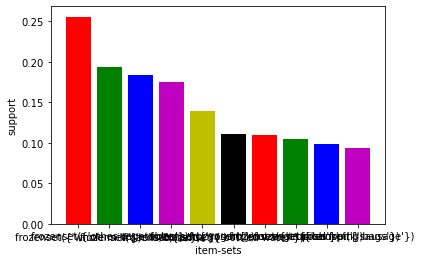

In [15]:
# Most Frequent item sets based on support 
frequent_itemsets1.sort_values('support',ascending = False,inplace=True)
plt.bar(x = list(range(0,10)),height = frequent_itemsets1.support[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),frequent_itemsets1.itemsets[0:10])
plt.xlabel('item-sets');plt.ylabel('support')

In [16]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.7)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
...,...,...,...,...,...,...,...,...,...
613,(curd),(rolls/buns),0.053279,0.183935,0.010066,0.188931,1.027164,0.000266,1.006160
614,(tropical fruit),(napkins),0.104931,0.052364,0.010066,0.095930,1.831988,0.004571,1.048189
615,(napkins),(tropical fruit),0.052364,0.104931,0.010066,0.192233,1.831988,0.004571,1.108078
616,(whole milk),(hard cheese),0.255516,0.024504,0.010066,0.039395,1.607682,0.003805,1.015502


In [17]:
#Top 10 rules as per lift value
rules1.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
610,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
607,"(yogurt, whole milk)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
550,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
551,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242
593,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
596,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697
383,(root vegetables),"(tropical fruit, other vegetables)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776
382,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
182,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
183,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628


<ipython-input-18-8c6570686c14>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0,10)),height = rules1.lift[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),rules1.antecedents[0:10])


Text(0, 0.5, 'lift')

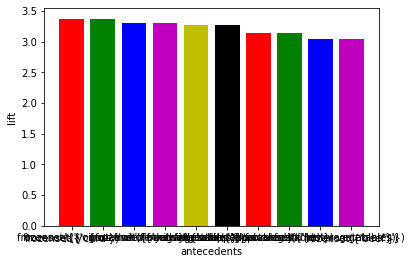

In [18]:
# Top 10 antecedents based on lift for rules1
rules1.sort_values('lift',ascending = False,inplace=True)
plt.bar(x = list(range(0,10)),height = rules1.lift[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),rules1.antecedents[0:10])
plt.xlabel('antecedents');plt.ylabel('lift')

In [19]:
##Apriori Algorithm
frequent_itemsets2 = apriori(Groceries,min_support=0.025,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
83,0.027351,"(yogurt, soda)"
84,0.042298,"(tropical fruit, whole milk)"
85,0.029283,"(yogurt, tropical fruit)"
86,0.032232,"(whipped/sour cream, whole milk)"


In [20]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.7)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(soda),0.110524,0.174377,0.028978,0.262190,1.503577,0.009705,1.119017
1,(soda),(bottled water),0.174377,0.110524,0.028978,0.166181,1.503577,0.009705,1.066750
2,(bottled water),(whole milk),0.110524,0.255516,0.034367,0.310948,1.216940,0.006126,1.080446
3,(whole milk),(bottled water),0.255516,0.110524,0.034367,0.134501,1.216940,0.006126,1.027703
4,(whole milk),(brown bread),0.255516,0.064870,0.025216,0.098687,1.521293,0.008641,1.037519
...,...,...,...,...,...,...,...,...,...
63,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594
64,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
65,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323
66,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


<ipython-input-21-2f5ea5fe7d15>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0,10)),height = rules2.lift[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),rules2.antecedents[0:10])


Text(0, 0.5, 'lift')

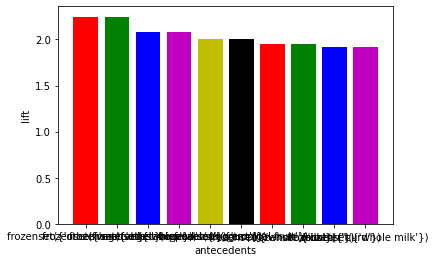

In [21]:
# Top 10 antecedents based on lift for rules2
rules2.sort_values('lift',ascending = False,inplace=True)
plt.bar(x = list(range(0,10)),height = rules2.lift[0:10],color='rgbmyk');plt.xticks(list(range(0,10)),rules2.antecedents[0:10])
plt.xlabel('antecedents');plt.ylabel('lift')

In [22]:
##Apriori Algorithm
frequent_itemsets3 = apriori(Groceries,min_support=0.05,use_colnames=True)
frequent_itemsets3

,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [23]:
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=0.7)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


<ipython-input-24-c83f7000528d>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0,6)),height = rules3.lift[0:6],color='rgbmyk');plt.xticks(list(range(0,6)),rules3.antecedents[0:6])


Text(0, 0.5, 'lift')

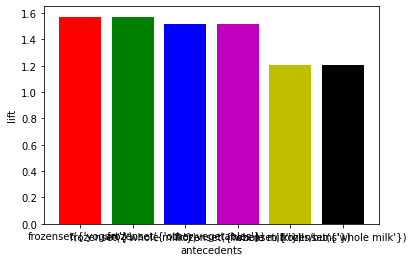

In [24]:
# Top antecedents based on lift for rules3
rules3.sort_values('lift',ascending = False,inplace=True)
plt.bar(x = list(range(0,6)),height = rules3.lift[0:6],color='rgbmyk');plt.xticks(list(range(0,6)),rules3.antecedents[0:6])
plt.xlabel('antecedents');plt.ylabel('lift')

In [25]:
########################## To eliminate Redudancy in Rule3 #################################### 
def to_list(i):
    return (sorted(list(i)))

In [26]:
ma_X = rules3.antecedents.apply(to_list)+rules3.consequents.apply(to_list)

In [27]:
ma_X = ma_X.apply(sorted)

In [28]:
rules_sets = list(ma_X)

In [29]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []

In [30]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [31]:
# getting rules without any redudancy 
rules_no_redudancy  = rules3.iloc[index_rules,:]

In [32]:
# Sorting them with respect to list and getting top rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696


<ipython-input-33-10f319ef684d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_no_redudancy.sort_values('lift',ascending = False,inplace=True)
<ipython-input-33-10f319ef684d>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.bar(x = list(range(0,3)),height = rules_no_redudancy.lift[0:3],color='rgbmyk');plt.xticks(list(range(0,3)),rules_no_redudancy.antecedents[0:3])


Text(0, 0.5, 'lift')

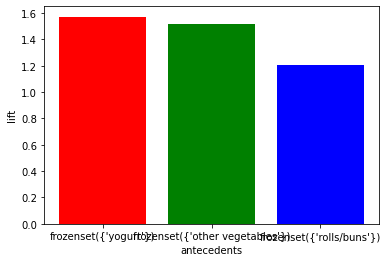

In [33]:
# Top  antecedents based on lift for rules3 after eliminating redundancy
rules_no_redudancy.sort_values('lift',ascending = False,inplace=True)
plt.bar(x = list(range(0,3)),height = rules_no_redudancy.lift[0:3],color='rgbmyk');plt.xticks(list(range(0,3)),rules_no_redudancy.antecedents[0:3])
plt.xlabel('antecedents');plt.ylabel('lift')